In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("new_insurance_data.csv")

In [3]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


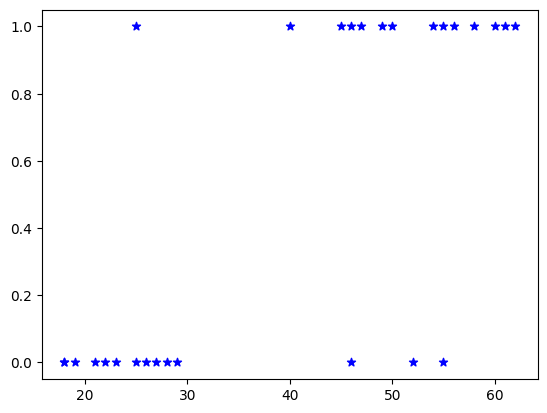

In [4]:
plt.scatter(df.age,df.bought_insurance, marker='*', color='blue')

In [5]:
df.shape

(28, 3)

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.8)

In [8]:
x_test

,age
3,52
14,49
24,50
20,21
25,54
2,47
21,26
18,19
4,46
0,22


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(x_train,y_train)

LogisticRegression()

In [11]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0])

In [12]:
model.predict_proba(x_test)

array([[2.73666828e-02, 9.72633317e-01],
       [7.26786100e-02, 9.27321390e-01],
       [5.27635066e-02, 9.47236493e-01],
       [9.99102565e-01, 8.97434517e-04],
       [1.40133459e-02, 9.85986654e-01],
       [1.34318728e-01, 8.65681272e-01],
       [9.95071074e-01, 4.92892633e-03],
       [9.99546483e-01, 4.53516903e-04],
       [1.79192886e-01, 8.20807114e-01],
       [9.98737750e-01, 1.26224967e-03],
       [6.28790178e-01, 3.71209822e-01],
       [1.79192886e-01, 8.20807114e-01],
       [9.96491909e-01, 3.50809137e-03],
       [9.99677634e-01, 3.22366091e-04],
       [3.61321944e-03, 9.96386781e-01],
       [1.30016371e-03, 9.98699836e-01],
       [9.24400792e-04, 9.99075599e-01],
       [9.86390245e-01, 1.36097552e-02],
       [9.93078774e-01, 6.92122601e-03],
       [7.12790492e-03, 9.92872095e-01],
       [1.00001116e-02, 9.89999888e-01],
       [2.34989375e-01, 7.65010625e-01],
       [9.96491909e-01, 3.50809137e-03]])

In [13]:
model.score(x_test,y_test)

0.782608695652174

In [14]:
model.coef_

array([[0.34147592]])

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [16]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age']/100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age']/100

In [17]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)


(5, 1)
(23, 1)


In [18]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,),activation='sigmoid', kernel_initializer='ones',bias_initializer='zeros')
])

model.compile(optimizer="sgd", loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_scaled, y_train, epochs = 10, verbose=1, validation_data = (x_test_scaled, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4000 - loss: 0.6676 - val_accuracy: 0.5217 - val_loss: 0.6610
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.4000 - loss: 0.6672 - val_accuracy: 0.5217 - val_loss: 0.6609
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.4000 - loss: 0.6668 - val_accuracy: 0.5217 - val_loss: 0.6607
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.4000 - loss: 0.6665 - val_accuracy: 0.5217 - val_loss: 0.6606
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4000 - loss: 0.6661 - val_accuracy: 0.5217 - val_loss: 0.6604
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.4000 - loss: 0.6658 - val_accuracy: 0.5217 - val_loss: 0.6603
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4000 - loss: 0.6654 - val_accuracy: 0.5217 - val_loss: 0.6601
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4000 - loss: 0.6651 - val_accuracy: 0.5217 - val_loss: 0.6600
Epoch 

In [19]:
# L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_l1.fit(x_train, y_train)
print("L1 Regularized Accuracy:", model_l1.score(x_train_scaled, y_train))
print("L1 Coefficients:", model_l1.coef_)

# L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model_l2.fit(x_train, y_train)
print("L2 Regularized Accuracy:", model_l2.score(x_train_scaled, y_train))
print("L2 Coefficients:", model_l2.coef_)

L1 Regularized Accuracy: 0.4
L1 Coefficients: [[0.01094541]]
L2 Regularized Accuracy: 0.6
L2 Coefficients: [[0.03051809]]


We can see there is not much change in accuracy even after L1 and L2 regularization as the model is too simple and the dataset is very small